# [LAB-06] 11. 서브플롯 (1)

**sub-plotting:** 

하나의 그래픽 영역을 나누어 두개 이상의 시각화 결과물(그래프)을 하나의 화면에 출력, 표현하는 기법

## #01. 준비작업

### 1. 패키지 참조

In [11]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

### 2. 그래프 전역 설정

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [3]:
origin = load_data('traffic_acc')
origin.head()

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808


### 4. 데이터 전처리

보기 좋게 가공하기 위해 년도별 평균으로 각 수치들을 전처리 ㄱㄱ

In [6]:
df = origin.drop('월', axis=1).groupby('년도').mean()
df.head()

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000


## #02. 서브플롯 기본 사용법

### [1] 서브플롯 영역 나누기: .subplots(행, 열, [, figsize=(가로크기, 세로크기)])

ex) 2행 3열을 갖는 서브플롯 영역 구성 먼저 해보기:
`plt.subplots(rows, cols, [figsize(가로크기, 세로크기)])`

이때, `plt.subplots()` 메서드에 의해 리턴되는
- fig는 그래픽 처리 기능을 제공하는 객체임
- ax 객체는 분할된 각 그래프 영역의 객체를 저장하고 있는 `리스트`임

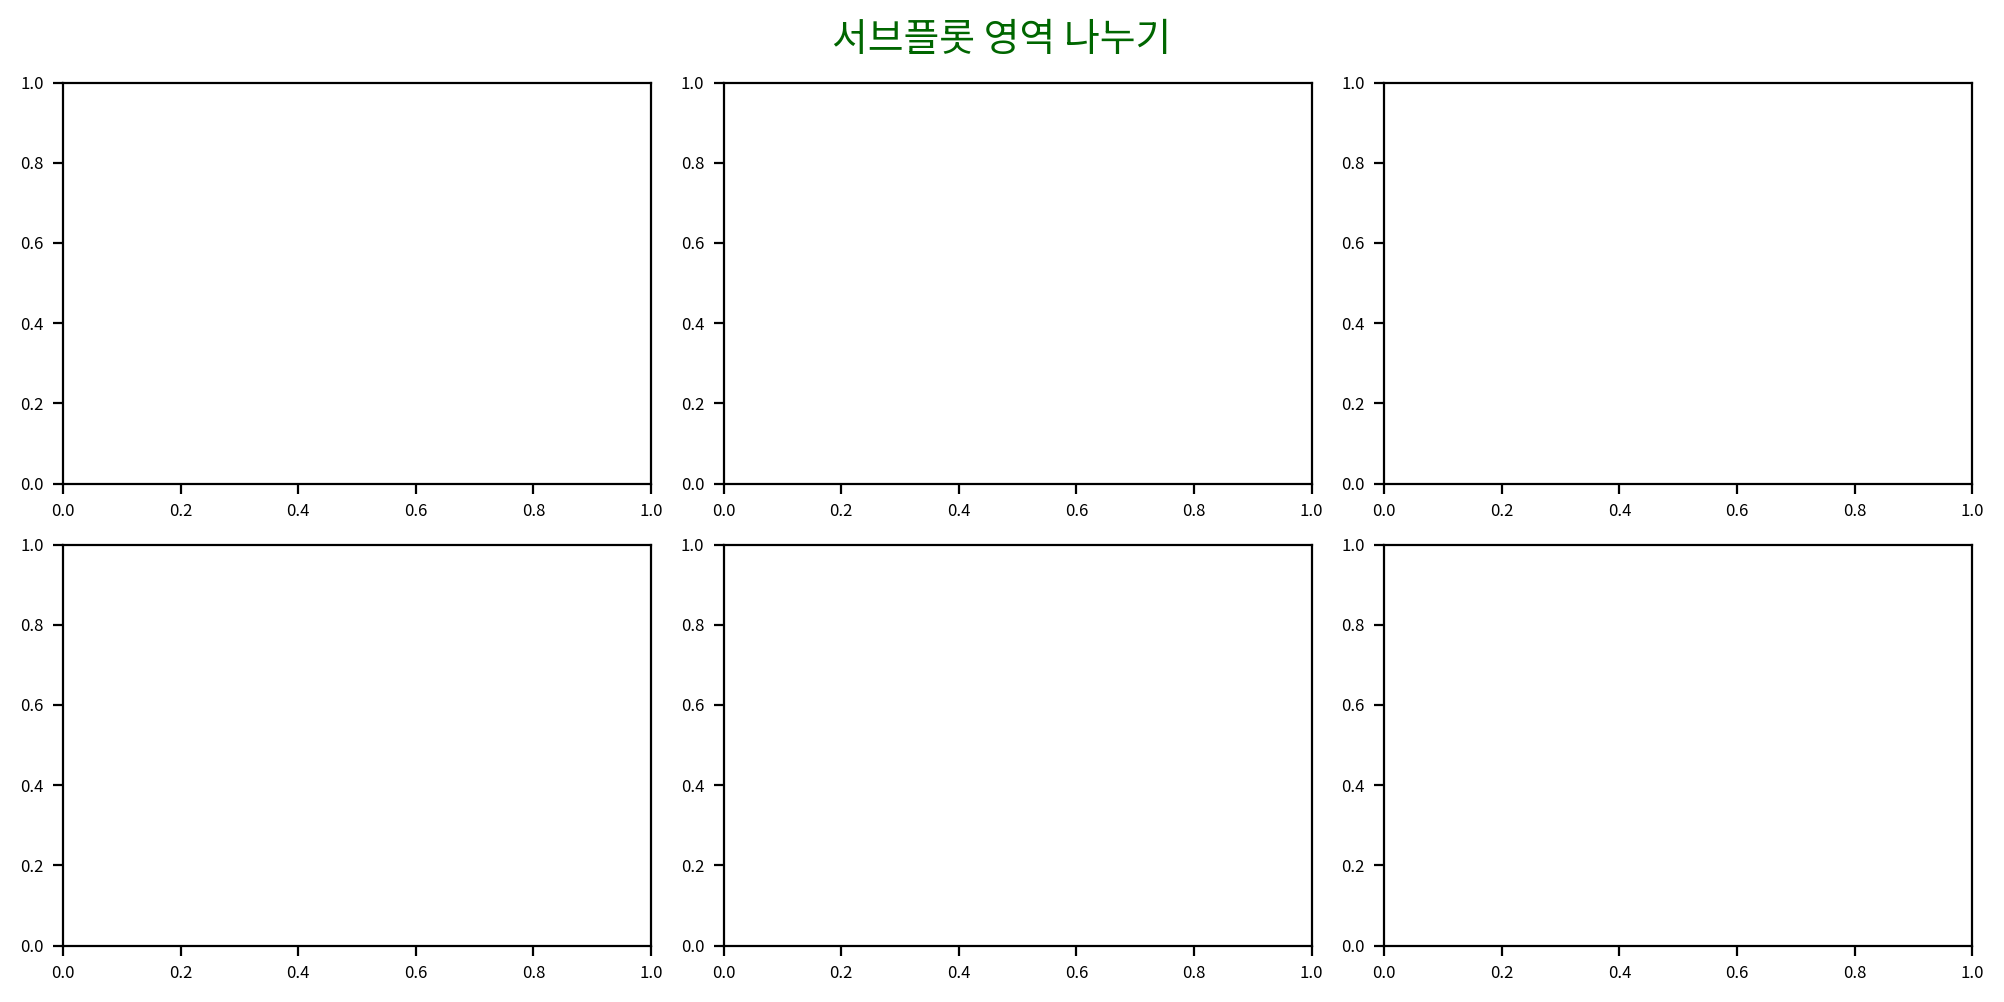

In [ ]:
# 1) 그래프 초기화
width_px = 2000             # 그래프 가로 크기
height_px = 1000            # 그래프 세로 크기
rows = 2                    # 행 수 ≠ 1
cols = 3                    # 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)

# ax 객체가 행, 열 수에 따라 리스트가 됨
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) Sub plots 그래프 그리기
# ...

# 3) 그래프 꾸미기: 
# 전체 제목: fig.suptitle('', fontsize = , color = )
fig.suptitle('서브플롯 영역 나누기', fontsize = 14, color ='#006600')

# 각 그래프 간 가로(wspace), 세로(hspace) 간격 지정:
#   fig.subplots_adjust(wspace = , hspace = )
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

 ### [2] 각 서브플롯에 그래프 그리기

 `plt.subplots()` 메서드 결과로 `ax`에 반환되는 객체는 서브플롯의 `행, 열에 대한 리스트`이다.

TypeError: Axes.set_title() missing 1 required positional argument: 'label'

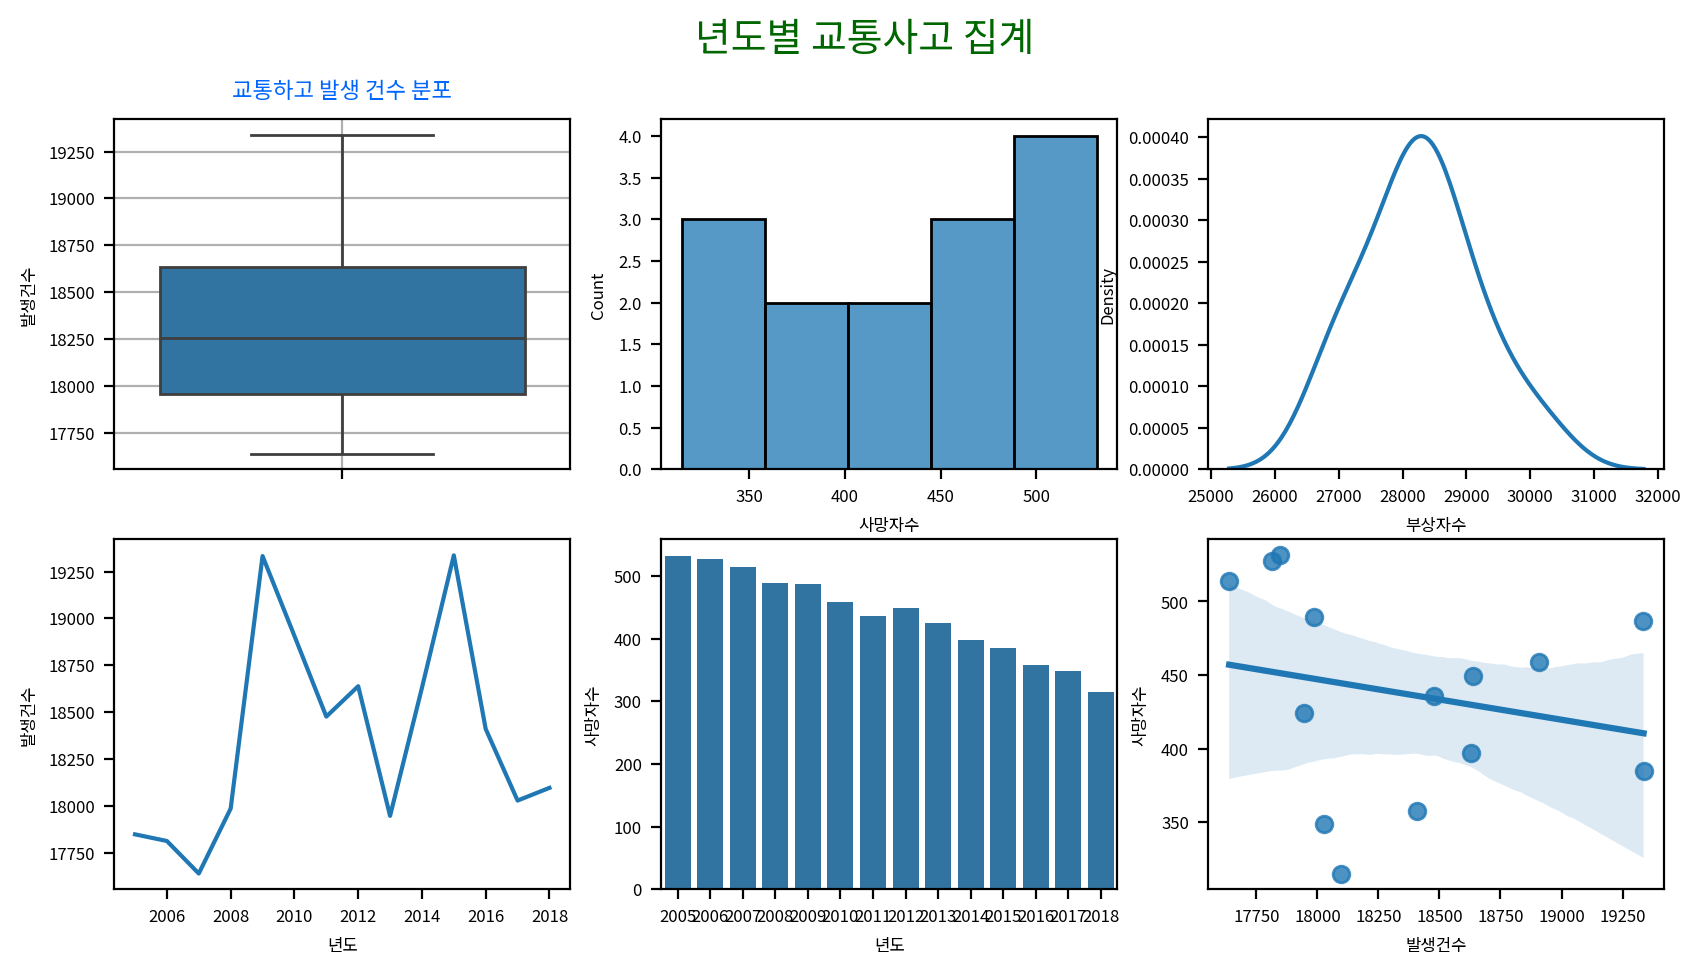

In [18]:
# 1) 그래프 초기화
width_px = 2000             # 그래프 가로 크기
height_px = 1000            # 그래프 세로 크기
rows = 2                    # 행 수 ≠ 1
cols = 3                    # 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) Sub plots 그래프 그리기
sb.boxplot(data=df, ax = ax[0][0], y='발생건수')
sb.histplot(data=df, ax = ax[0][1], x='사망자수', 
            bins = 5)
sb.kdeplot(data=df, ax = ax[0][2], x='부상자수')
sb.lineplot(data=df, ax = ax[1][0], x=df.index, y='발생건수')
sb.barplot(data=df, ax = ax[1][1], x=df.index, y='사망자수',
           estimator = np.sum)
sb.regplot(data=df, ax = ax[1][2], x='발생건수', y='사망자수')

# 3) 그래프 꾸미기: 전체 제목
fig.suptitle('년도별 교통사고 집계', fontsize = 14, color ='#006600')

# 각 그래프 간 간격 지정: 가로(wspace), 세로(hspace)
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

# 첫째 행 스타일 지정: 그래프 집단의 제목, 글자크기, 색상, 격자
ax[0][0].set_title('교통하고 발생 건수 분포', color='#0066ff', fontsize=8, pad=8)
ax[0][0].grid()

# 둘째 행 스타일 지정: 그래프 x축 설정, x랑 y축 라벨 지정, 격자
hist, bins = np.histogram(df['사망자수'], bins = 5)
bins = bins.round().astype('int')
ax[0][1].set_title()
ax[0][1].set_xticks(bins, bins)
ax[0][1].set_xlabel('구간')
ax[0][1].set_ylabel('집계')
ax[0][1].grid()

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

## #03. 두 개의 y축을 갖는 그래프

### 1. 샘플 데이터 만들기

1) 공용 x축 데이터:

In [19]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

2) 첫 번째 y축 데이터

In [20]:
y1 = np.arange(10)
y1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

3) 두 번째 y축 데이터

In [21]:
y2 = x**2
y2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

### 2. 서브플롯으로 2개의 y축을 갖는 그래프 구현

by: ax.twinx() 메서드

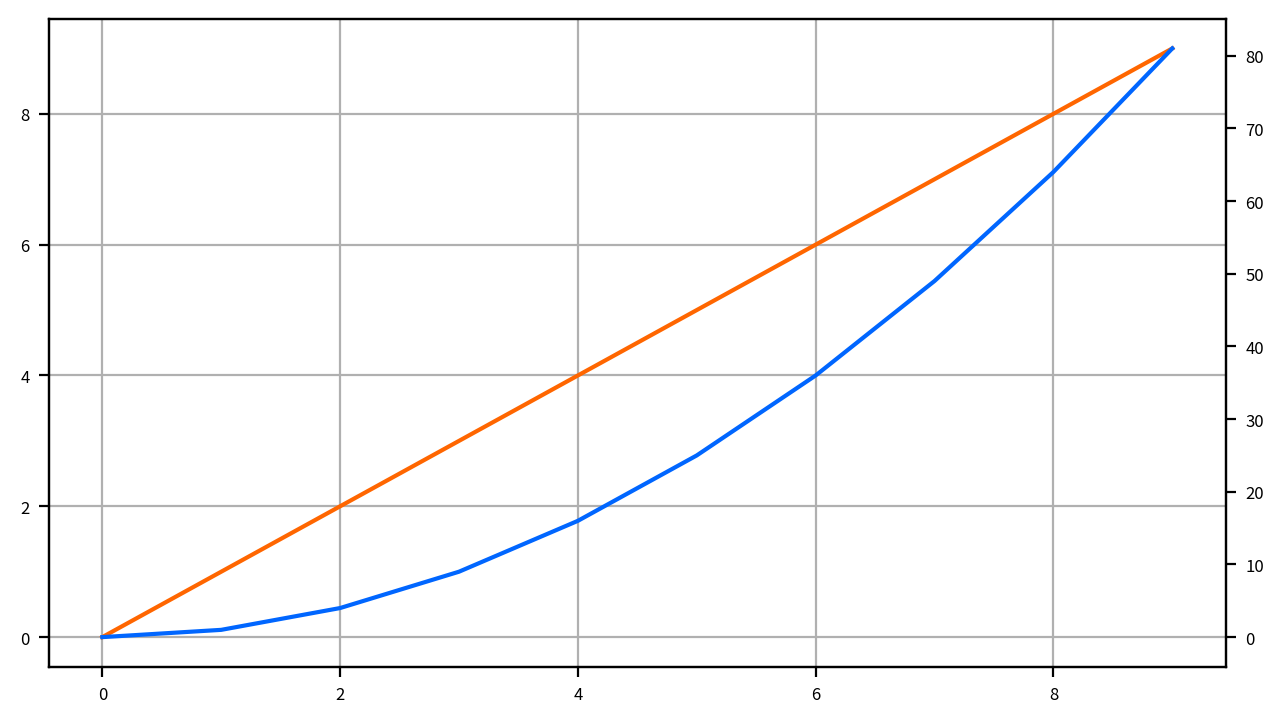

In [ ]:
# 1) 그래프 초기화 
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
# for x, y1:
fig, ax1 = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
# for x, y2:
ax2 = ax1.twinx()

# 2) lineplot 그래프 그리기
sb.lineplot(x=x, y = y1, color='#ff6600', ax = ax1)
sb.lineplot(x=x, y = y2, color='#0066ff', ax = ax2)

# 3) 그래프 꾸미기: 
ax1.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

## #04. 교통사고 발생건수와 사망자수 변화 시각화하기

> 공용 x축과 y축 2개 갖는 subplot with twinx

Backgraound:
- 우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안)을 개정한 이후 꾸준히 교통사고안전기준을 강화해 왔다.
- 이러한 노력이 교통사고 부상자수를 줄이는 데 효과가 있었는지 분석해보자.

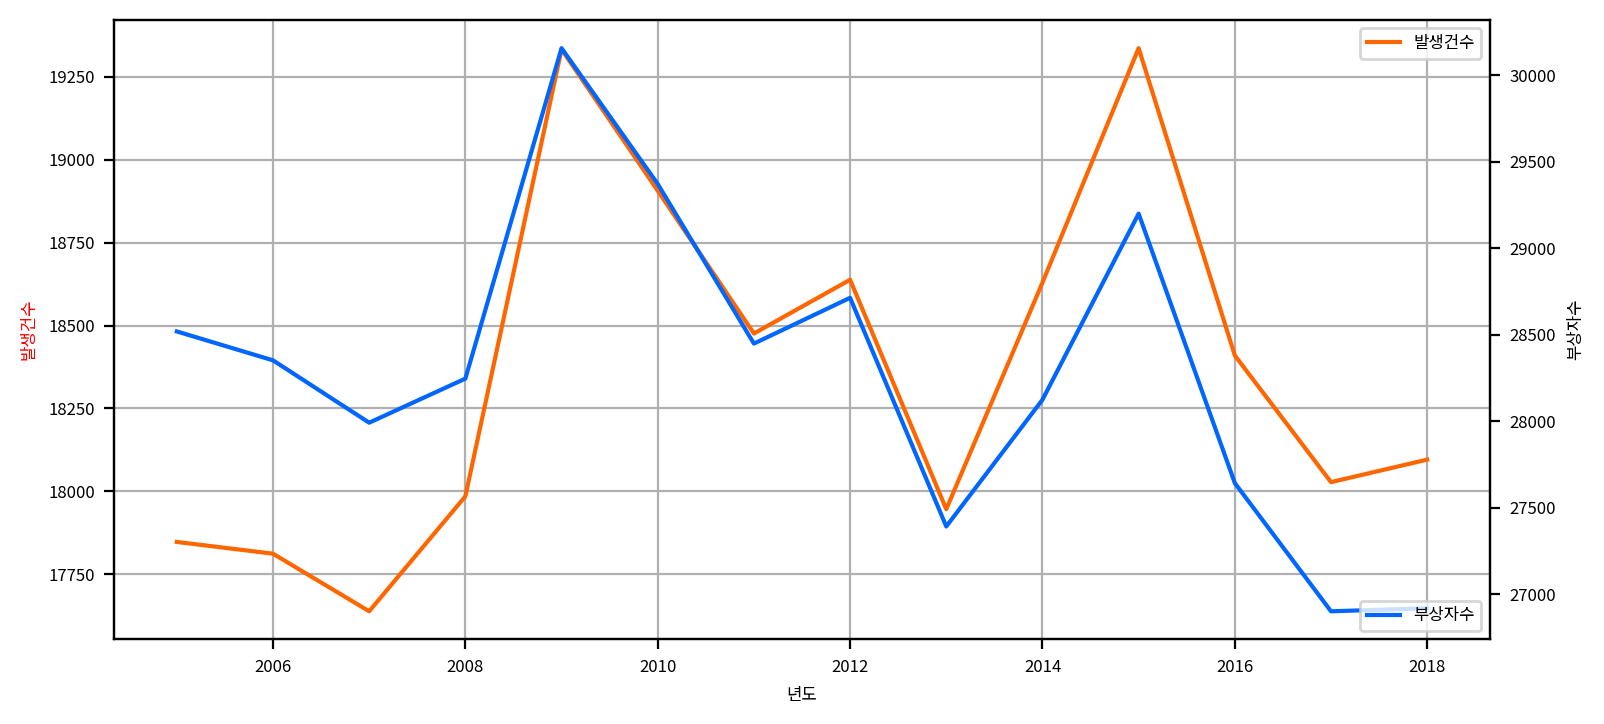

In [25]:
# 1) 그래프 초기화 
width_px = 1600             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
# for x, y1:
fig, ax1 = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
# for x, y2:
ax2 = ax1.twinx()

# 2) lineplot 그래프 그리기
sb.lineplot(data = df, x=df.index, y = '발생건수', color='#ff6600', 
            ax = ax1, label = '발생건수')
sb.lineplot(data = df, x=df.index, y = '부상자수', color='#0066ff', 
            ax = ax2, label = '부상자수')

# 3) 그래프 꾸미기: 
ax1.grid(True)               # 배경, 격자 표시/숨김
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color = '#ff0000')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

**해석**:

개정안이 시행되기 전(2008년)의 교통사고 발생건수 대비 부상자수의 비율은 개정안이 시행된 이후 현저히 떨어짐을 위의 그래프로 확인할 수 있다.